### Introduction to Neural Networks in Tensorflow

In [1]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)


2.13.0


### Creating data to view and fit

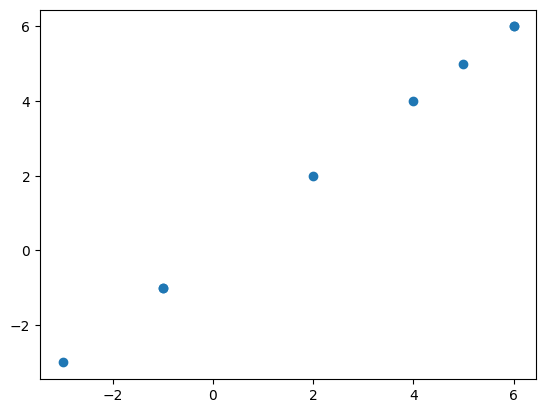

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-1.0,-3.0,-1.0,5,6,4,6,2])

# Create labels
y = np.array([-1.0,-3.0,-1.0,5,6,4,6,2])

# Visualize it
plt.scatter(X, y)

### Input and output shapes

In [3]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [4]:
 # Turn our numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-1., -3., -1.,  5.,  6.,  4.,  6.,  2.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([-1., -3., -1.,  5.,  6.,  4.,  6.,  2.])>)

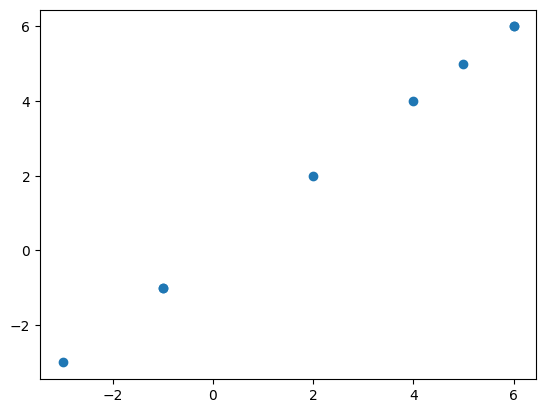

In [5]:
plt.scatter(X, y)

### Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** -letting the model try to find patterns between X and y (features and labels)

In [8]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae, # mae isshort for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
            metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 244ms/step - loss: 3.2674 - mae: 3.2674
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 3.1442 - mae: 3.1442
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 3.0211 - mae: 3.0211
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 2.8980 - mae: 2.8980
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 2.7749 - mae: 2.7749
